Web scraping of news headlines of compnaies from https://finviz.com/quote.ashx?t=' and use it for sentiment analysis.

In [ ]:
from urllib.request import urlopen, Request
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [81]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pickle

In [82]:
finwiz_url = 'https://finviz.com/quote.ashx?t='
news_tables = {}
tickers = ['AMZN', 'TSLA', 'GOOG']

for ticker in tickers:
    url = finwiz_url + ticker
    #req = requests.get(url)
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response,"html.parser")
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [83]:
html

<!DOCTYPE html>

<html>
<head>
<title>GOOG Alphabet Inc. Stock Quote</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1024" name="viewport"/><meta content="Stock screener for investors and traders, financial visualizations." name="description"/>
<meta content="Stock Screener, Charts, Quotes, Maps, News, Financial Visualizations, Research, Trading Systems" name="keywords"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="no-cache" http-equiv="pragma"/>
<meta content="no-cache" http-equiv="cache-control"/>
<meta content="-1" http-equiv="Expires"/>
<link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-regular.woff2" rel="preload"/>
<link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-700.woff2" rel="preload"/>
<link href="/css/finviz.css?rev=154" rel="stylesheet" type="text/css"/>
<link href="/favicon_2x.png" rel="icon" sizes="32x32" type="image/png"/>
<link href="/favicon.png" rel="icon" sizes="16x16" type="i

In [84]:
amazon=news_tables['AMZN']
amazon_tr=amazon.findAll('tr')

In [85]:
for i, table_row in enumerate(amazon_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)

Amazon Fights Back Against Unionizing Efforts
Feb-05-21 01:00PM  
Tapestry just gained 1.5 million new customers, some buying $4,200 handbags: CEO
12:39PM  
How YouTube, Cloud, and Hardware Drove Alphabet Stock to an All-Time High
11:57AM  
Amazon Bid to Delay Union Vote Rejected; Balloting Starts Monday
11:11AM  
Better Investing Opportunity: Magnite or Roku?
11:00AM  
Better Buy: Amazon vs. Dollar Tree
10:30AM  
More companies than usual are beating earnings estimates  and sales numbers are just as bullish for the stock market
10:02AM  
REFILE-'Dystopia Prime:' Amazon AI van cameras spark surveillance concerns
09:22AM  
Jeff Bezos Is Stepping Back: Where Amazon Stock Goes From Here
08:45AM  
Spotify Had a Terrible Quarter -- Here Are 5 Reasons Why It's Still a Buy
08:30AM  
15 Fastest Growing Developing Countries in 2020
08:25AM  
These 2 Tech Stocks Are Absurdly Overvalued Right Now
08:19AM  
1 Reason Jumia's Monster Run Is Just Getting Started
08:08AM  
Better Than Bezos? 14 Founde

In [86]:
all_tickers_news=[]

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        all_tickers_news.append([ticker, date, time, text])
        
all_tickers_news

[['AMZN',
  'Feb-05-21',
  '01:00PM',
  'Amazon Fights Back Against Unionizing Efforts'],
 ['AMZN',
  'Feb-05-21',
  '12:39PM',
  'Tapestry just gained 1.5 million new customers, some buying $4,200 handbags: CEO'],
 ['AMZN',
  'Feb-05-21',
  '11:57AM',
  'How YouTube, Cloud, and Hardware Drove Alphabet Stock to an All-Time High'],
 ['AMZN',
  'Feb-05-21',
  '11:11AM',
  'Amazon Bid to Delay Union Vote Rejected; Balloting Starts Monday'],
 ['AMZN',
  'Feb-05-21',
  '11:00AM',
  'Better Investing Opportunity: Magnite or Roku?'],
 ['AMZN', 'Feb-05-21', '10:30AM', 'Better Buy: Amazon vs. Dollar Tree'],
 ['AMZN',
  'Feb-05-21',
  '10:02AM',
  'More companies than usual are beating earnings estimates  and sales numbers are just as bullish for the stock market'],
 ['AMZN',
  'Feb-05-21',
  '09:22AM',
  "REFILE-'Dystopia Prime:' Amazon AI van cameras spark surveillance concerns"],
 ['AMZN',
  'Feb-05-21',
  '08:45AM',
  'Jeff Bezos Is Stepping Back: Where Amazon Stock Goes From Here'],
 ['AMZN

In [87]:
news_tables.items()

dict_items([('AMZN', <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">Feb-05-21 01:00PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/millionacres/real-estate-investing/articles/amazon-fights-back-against-unionizing-efforts/?source=eptyholnk0000202&amp;utm_source=yahoo-host&amp;utm_medium=feed&amp;utm_campaign=article" target="_blank">Amazon Fights Back Against Unionizing Efforts</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Motley Fool</span></div></div></td></tr>
<tr><td align="right" width="130">12:39PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/tapestry-just-gained-15-million-new-customers-some-buying-4200-handbags-ceo-173913497.html" targe

In [88]:
columns = ['ticker', 'date', 'time', 'headline']

In [89]:
scraped_news = pd.DataFrame(all_tickers_news, columns=columns)
scraped_news

,ticker,date,time,headline
0,AMZN,Feb-05-21,01:00PM,Amazon Fights Back Against Unionizing Efforts
1,AMZN,Feb-05-21,12:39PM,Tapestry just gained 1.5 million new customers...
2,AMZN,Feb-05-21,11:57AM,"How YouTube, Cloud, and Hardware Drove Alphabe..."
3,AMZN,Feb-05-21,11:11AM,Amazon Bid to Delay Union Vote Rejected; Ballo...
4,AMZN,Feb-05-21,11:00AM,Better Investing Opportunity: Magnite or Roku?
...,...,...,...,...
295,GOOG,Feb-02-21,07:12PM,Alphabet Shares Jump on Ad Revenue Gains in Ho...
296,GOOG,Feb-02-21,07:11PM,Amazons Bezos to Cede Chief Executive Officer ...
297,GOOG,Feb-02-21,07:00PM,Google blows through forecasts with ad spendin...
298,GOOG,Feb-02-21,06:10PM,Google owner Alphabet sees record growth as ad...


In [90]:
data=scraped_news.iloc[:,3:4]
data.replace("[^a-zA-Z]"," ",regex=True ,inplace=True)
data.head(5)

C:\Users\Mayank\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,headline
0,Amazon Fights Back Against Unionizing Efforts
1,Tapestry just gained million new customers...
2,How YouTube Cloud and Hardware Drove Alphabe...
3,Amazon Bid to Delay Union Vote Rejected Ballo...
4,Better Investing Opportunity Magnite or Roku


In [91]:
lemmatizer=WordNetLemmatizer()


In [92]:
headlines=data['headline']

In [93]:
headlines

0          Amazon Fights Back Against Unionizing Efforts
1      Tapestry just gained     million new customers...
2      How YouTube  Cloud  and Hardware Drove Alphabe...
3      Amazon Bid to Delay Union Vote Rejected  Ballo...
4         Better Investing Opportunity  Magnite or Roku 
                             ...                        
295    Alphabet Shares Jump on Ad Revenue Gains in Ho...
296    Amazons Bezos to Cede Chief Executive Officer ...
297    Google blows through forecasts with ad spendin...
298    Google owner Alphabet sees record growth as ad...
299    Amazon  Google Post Big Q  Beats  Chipotle Misses
Name: headline, Length: 300, dtype: object

In [94]:

for i in range(len(headlines)):
    words=nltk.word_tokenize(headlines[i])
    words=[lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    headlines[i]=' '.join(words)

C:\Users\Mayank\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [95]:
headlines

0          Amazon Fights Back Against Unionizing Efforts
1      Tapestry gained million new customer buying ha...
2      How YouTube Cloud Hardware Drove Alphabet Stoc...
3      Amazon Bid Delay Union Vote Rejected Balloting...
4              Better Investing Opportunity Magnite Roku
                             ...                        
295    Alphabet Shares Jump Ad Revenue Gains Holiday ...
296    Amazons Bezos Cede Chief Executive Officer Rol...
297            Google blow forecast ad spending recovery
298    Google owner Alphabet see record growth ad spe...
299       Amazon Google Post Big Q Beats Chipotle Misses
Name: headline, Length: 300, dtype: object

In [96]:
data['headlines']=headlines

C:\Users\Mayank\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [97]:
#adding new columns subjectivity and polarity
data['subjectivity']=data['headlines'].apply(Calcsubjectivity)
data['polarity']=data['headlines'].apply(Calcpolarity)

C:\Users\Mayank\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [98]:
data.drop(['headline'],axis=1)

,headlines,subjectivity,polarity
0,Amazon Fights Back Against Unionizing Efforts,0.000000,0.000000
1,Tapestry gained million new customer buying ha...,0.454545,0.136364
2,How YouTube Cloud Hardware Drove Alphabet Stoc...,0.540000,0.160000
3,Amazon Bid Delay Union Vote Rejected Balloting...,0.000000,0.000000
4,Better Investing Opportunity Magnite Roku,0.500000,0.500000
...,...,...,...
295,Alphabet Shares Jump Ad Revenue Gains Holiday ...,0.000000,0.000000
296,Amazons Bezos Cede Chief Executive Officer Rol...,0.000000,0.000000
297,Google blow forecast ad spending recovery,0.000000,0.000000
298,Google owner Alphabet see record growth ad spe...,0.000000,0.000000


In [107]:
data_sentiment=pd.concat([scraped_news,data],axis=1)



In [109]:
Final_data_senti=data_sentiment.drop(['headline'],axis=1)

In [110]:
Final_data_senti

,ticker,date,time,headlines,subjectivity,polarity
0,AMZN,Feb-05-21,01:00PM,Amazon Fights Back Against Unionizing Efforts,0.000000,0.000000
1,AMZN,Feb-05-21,12:39PM,Tapestry gained million new customer buying ha...,0.454545,0.136364
2,AMZN,Feb-05-21,11:57AM,How YouTube Cloud Hardware Drove Alphabet Stoc...,0.540000,0.160000
3,AMZN,Feb-05-21,11:11AM,Amazon Bid Delay Union Vote Rejected Balloting...,0.000000,0.000000
4,AMZN,Feb-05-21,11:00AM,Better Investing Opportunity Magnite Roku,0.500000,0.500000
...,...,...,...,...,...,...
295,GOOG,Feb-02-21,07:12PM,Alphabet Shares Jump Ad Revenue Gains Holiday ...,0.000000,0.000000
296,GOOG,Feb-02-21,07:11PM,Amazons Bezos Cede Chief Executive Officer Rol...,0.000000,0.000000
297,GOOG,Feb-02-21,07:00PM,Google blow forecast ad spending recovery,0.000000,0.000000
298,GOOG,Feb-02-21,06:10PM,Google owner Alphabet see record growth ad spe...,0.000000,0.000000


In [111]:
def calcsentimentanalyze(text):
    sentianalyze=SentimentIntensityAnalyzer()
    sentiment=sentianalyze.polarity_scores(text)
    return sentiment

In [112]:
def Calcsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#function for calc the polarity
def Calcpolarity(text):
    return TextBlob(text).sentiment.polarity

In [113]:
compound=[]
pos=[]
neg=[]
neu=[]
Senti_Intense=0
for i in range(0,len(Final_data_senti['headlines'])):
    Senti_Intense=calcsentimentanalyze(Final_data_senti['headlines'][i])
    compound.append(Senti_Intense['compound'])
    neg.append(Senti_Intense['neg'])
    pos.append(Senti_Intense['pos'])
    neu.append(Senti_Intense['neu'])

In [114]:
Final_data_senti['Positive']=pos
Final_data_senti['Compound']=compound
Final_data_senti['Negative']=neg
Final_data_senti['Neutral']=neu

C:\Users\Mayank\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
Final_data_senti.head(3)

,ticker,date,time,headlines,subjectivity,polarity,Positive,Compound,Negative,Neutral
0,AMZN,Feb-05-21,01:00PM,Amazon Fights Back Against Unionizing Efforts,0.000000,0.000000,0.202,-0.2500,0.321,0.476
1,AMZN,Feb-05-21,12:39PM,Tapestry gained million new customer buying ha...,0.454545,0.136364,0.271,0.3818,0.000,0.729
2,AMZN,Feb-05-21,11:57AM,How YouTube Cloud Hardware Drove Alphabet Stoc...,0.540000,0.160000,0.000,0.0000,0.000,1.000


In [117]:
Final_data_senti.to_csv(r'D:\Stock_webscraping.csv')

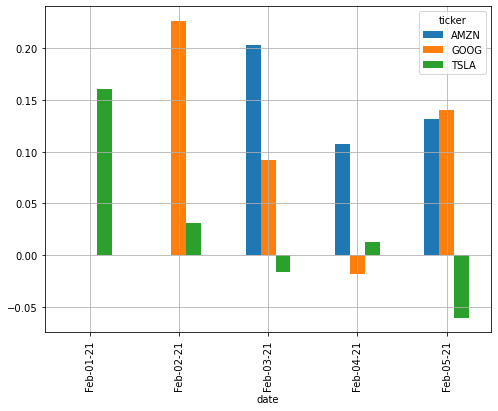

In [120]:
plt.rcParams['figure.figsize'] = [8, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = Final_data_senti.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('Compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()